In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dxchange
import numpy as np
from convnet.utils import nor_data
from convnet.utils import extract_3d
from convnet.utils import img_window
from convnet.classify import train

Using Theano backend.
Using gpu device 0: Tesla M2050 (CNMeM is disabled, cuDNN not available)


In [3]:
np.random.seed(1337)
dim_img = 128
patch_size = (dim_img, dim_img)
batch_size = 50
nb_classes = 2
nb_epoch = 12

number of convolutional filters to use

In [4]:
nb_filters = 32

size of pooling area for max pooling

In [5]:
nb_pool = 2


convolution kernel size

In [6]:
nb_conv = 3

Please download the test data from the classify_train folder at

http://tinyurl.com/APS-convnet

and put them in the test_data folder

In [7]:
fname = '../../test/test_data/1038.tiff'
img_x = dxchange.read_tiff(fname)

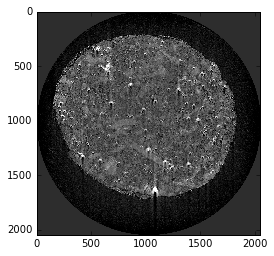

In [8]:
plt.imshow(img_x, cmap='Greys_r')
plt.clim(-0.0005,0.0028)
plt.show()

In [9]:
ind_uncenter1 = range(1038, 1047)
ind_uncenter2 = range(1049, 1057)
uncenter1 = dxchange.read_tiff_stack(fname, ind=ind_uncenter1, digit=4)
uncenter2 = dxchange.read_tiff_stack(fname, ind=ind_uncenter2, digit=4)
uncenter = np.concatenate((uncenter1, uncenter2), axis=0)
uncenter = nor_data(uncenter)

In [10]:
uncenter = img_window(uncenter[:, 360:1460, 440:1440], 200)

In [11]:
uncenter_patches = extract_3d(uncenter, patch_size, 1)

In [12]:
np.random.shuffle(uncenter_patches)

In [13]:
center_img = dxchange.read_tiff('../../test/test_data/1048.tiff')

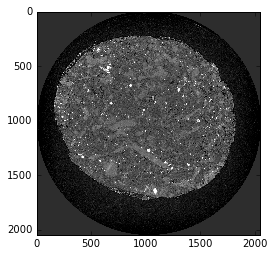

In [14]:
plt.imshow(center_img, cmap='Greys_r')
plt.clim(-0.0005,0.0028)
plt.show()

In [15]:
center_img = nor_data(center_img)

In [16]:
center_img = img_window(center_img[360:1460, 440:1440], 400)
center_patches = extract_3d(center_img, patch_size, 1)
np.random.shuffle(center_patches)

In [17]:
x_train = np.concatenate((uncenter_patches[0:50000], center_patches[0:50000]), axis=0)
x_test = np.concatenate((uncenter_patches[50000:60000], center_patches[50000:60000]), axis=0)
x_train = x_train.reshape(x_train.shape[0], 1, dim_img, dim_img)
x_test = x_test.reshape(x_test.shape[0], 1, dim_img, dim_img)
y_train = np.zeros(100000)
y_train[50000:99999] = 1
y_test = np.zeros(20000)
y_test[10000:19999] = 1

In [18]:
model = train(x_train, y_train, x_test, y_test, dim_img, nb_filters, nb_conv, batch_size, nb_epoch, nb_classes)

(100000, 1, 128, 128) (100000, 2) (20000, 1, 128, 128) (20000, 2)
Train on 100000 samples, validate on 20000 samples
Epoch 1/12
100000/100000 [==============================] - 836s - loss: 0.1251 - acc: 0.9604 - val_loss: 0.0726 - val_acc: 0.9704
Epoch 2/12
100000/100000 [==============================] - 835s - loss: 0.0085 - acc: 0.9977 - val_loss: 0.1675 - val_acc: 0.9311
Epoch 3/12
100000/100000 [==============================] - 835s - loss: 0.0045 - acc: 0.9989 - val_loss: 0.0155 - val_acc: 0.9949
Epoch 4/12
100000/100000 [==============================] - 832s - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0090 - val_acc: 0.9976
Epoch 5/12
100000/100000 [==============================] - 834s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.1212 - val_acc: 0.9512
Epoch 6/12
100000/100000 [==============================] - 835s - loss: 9.9921e-04 - acc: 0.9998 - val_loss: 0.0033 - val_acc: 0.9991
Epoch 7/12
100000/100000 [==============================] - 835s - loss: 5.3466e-04 - acc: 0.

/local/decarlo/conda/anaconda/lib/python2.7/site-packages/keras/models.py:433: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Test score: 0.000806061122949
Test accuracy: 0.99995


In [20]:
model.save_weights('classify_training_weights.h5')

[WARNING] classify_training_weights.h5 already exists - overwrite? [y/n]n
